The core requirements of the portfolio 4 are:

    (2 marks) Propose well-defined questions or purposes to the analysis
    (2 marks) It should involve some data preparation and exploration. (Suggestion: The source address of the dataset can be provided to make our marking easy. Alternatively.  you can upload the dataset or a sampled subset to your Github repo.)
    (2 marks) You will make use of at least one or more analysis/prediction techniques learned from the unit since week 7.
    (2 marks) Develop some kind of visualisation of the data or results

Further instructions on these requirements:

**Requirement 2:** You may find Kaggle and UCI  useful as sources of data. But, you need to conduct data exploration: e.g. variable identification, univariate analysis, bi-variate analysis, missing value treatment etc. Some suggested data sources can be found from this link. We also encourage you to find other data sources for your portfolio 4 by yourself. 

For **requirement 3** you are encouraged to use more than one analysis technique. For example, you might use clustering to find groups within the data and then perform a linear regression on some variables within the groups. Or, you might use logistic regression to establish a baseline classification performance and then apply a neural network to see if you can improve performance. 

**Requirement 4** can be involved in any part of the project, such as data itself, data exploration, and data analysis. You may use a bar to visualise a categorical variable or a histogram for a numerical variable.

Note that you need to include necessary instructions and explanations in your notebook file to demonstrate that you have met these requirements. 

Here are a few suggestions for your portfolio:

1. Make use of linear regression as a predictive model and improve it using polynomial regression. Find important features using the RFE technique.

2. Make use of various classification/prediction/clustering techniques from the unit.

3. Use various criteria (or metrics) for evaluation:
    - For regression problems, consider using Mean Square Error (MSE), Mean Absolute Error (MAE), and R-squared (r2).
    - For classification problems, evaluate using accuracy, F-score, and Area Under the ROC curve (AUC).

4. First, implement a simple algorithm (or model) as a baseline and then improve the baseline using more complex models/techniques.

5. Do parameter analysis to find out which configuration of parameters gives the best model’s performance. For example, assess the performance under different k values for the KNN algorithm.

# Propose well-defined questions or purposes to the analysis
For this portfolio, I chose a kaggle dataset about [Pumpkin Seeds](https://www.kaggle.com/datasets/muratkokludataset/pumpkin-seeds-dataset/data). This dataset encapsulates a wide array of attributes, including Area, Perimeter, Major Axis Length, Minor Axis Length, Convex Area, Equiv Diameter, and more, alongside classifications for two distinct seed types (Çerçevelik and Ürgüp Sivrisi).

Firstly, we aim to employ the K-Nearest Neighbours algorithm to uncover natural groupings among seeds based on their shared characteristics. Additionally, the application of the Naive Bayes classifier will facilitate precise classification of each seed into a type. This portfolio endeavors to address fundamental questions such as optimal clustering configurations, predictive modeling of seed characteristics, and feature importance assessment. Furthermore, through visualizations, we seek to gain a comprehensive understanding of the intricate relationships within the dataset. These investigations collectively serve as a testament to the potency of data science techniques in unearthing insights from seemingly ordinary datasets. In doing so, we will be able to answer several key questions, including:
1. Can we use the given features to accurately classify each seed into its appropriate type?
2. Which features contribute the most towards distinguishing between different seed types?
3. Which model performs better?

As a result, we will be able to deepen our understanding of data science techniques while also making valuable insights about the data.

# Data Preparation and Exploration

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [76]:
data = pd.read_excel("Pumpkin_Seeds_Dataset/Pumpkin_Seeds_Dataset.xlsx")
data

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi


In [77]:
data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [78]:
data.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


Using these various methods, we see the data contains 2500 rows, of which only one is a categorical feature - the Class. Otherwise, there are various attributes corresponding to the pumpkin seeds available for use. All these attributes are non-null which is convenient as it lessens the need for data cleaning. On inspection, we see that the scales of various attributes is large. Although it's not really necessary for Naive Bayes, it'd be a good idea to normalise the data in preperation for the KNN algorithm as it measures the distance between points, and if the attributes are out of scale certain attributes would become negligible.

In [80]:
#Splitting the data 
X = data.drop(columns=['Class'])
y = data['Class']

In [81]:
#Before splitting normalise the data
scaler = StandardScaler()

# Fit the scaler to feature matrix 
X_normalized = scaler.fit_transform(X)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42, stratify=y)

We have successfully split the data into training and test sets. However, these sets include all the attributes of the data. With KNN algorithm, prediction accuracy can quickly degrade when the number of attributes grows, so we should make a different test set with a more strict selection of attributes. For that we will look at the correlation of the attributes.

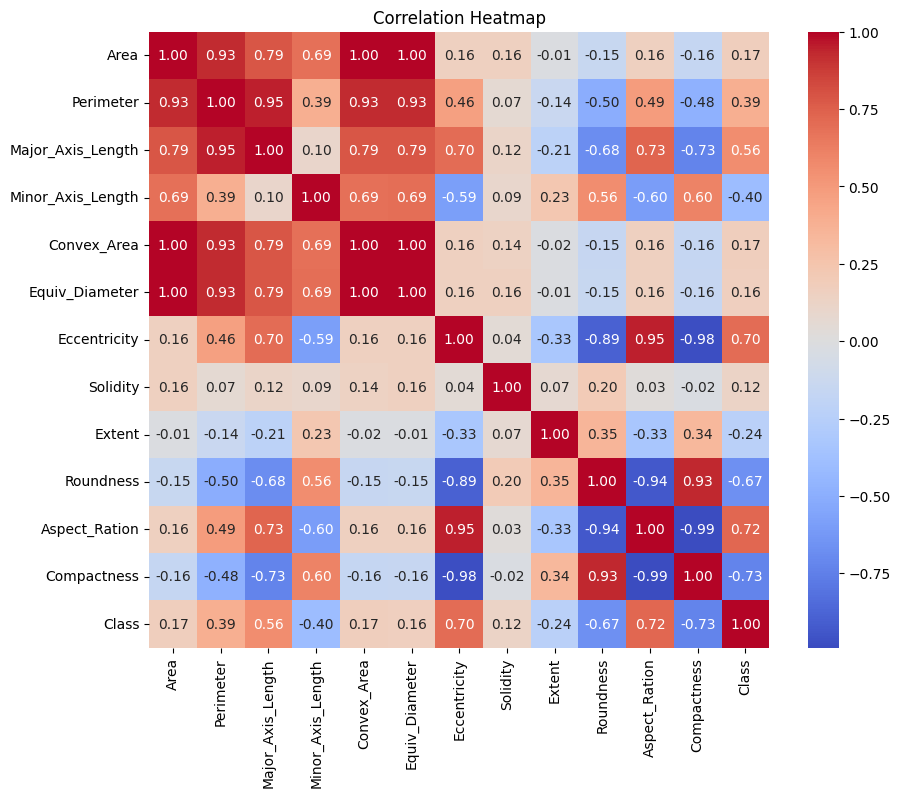

In [83]:
#First convert categorical features
le = LabelEncoder()
data['Class'] = le.fit_transform(data['Class'])

#Set correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

Some attributes are highly correlated to one another as they are derived e.g. area and convex_area. In terms of Class correlation, the most correlated features are Perimeter, Major_Axis_Length, Minor_Axis_Length, Eccentricity, Roundness, Aspect_Ration, and Compactness. These 7 attributes have at least .4 correlation. If we set a .6 cutoff, then our attributes would be Roundness, Aspect_Ration, and Compactness. 

# Analysis with KNN and Naive Bayes
## KNN

In [84]:
# Initialize KNN model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [86]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print(f'Testing accuracy is: {accuracy*100:.1f}%')

Testing accuracy is: 84.2%


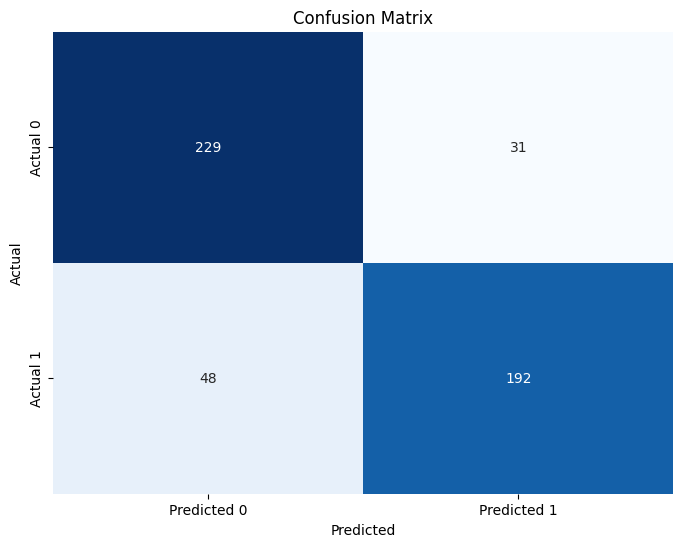

In [87]:
# Assuming 'y_true' contains the true labels and 'y_pred' contains the predicted labels
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

We see that the baseline KNN algorithm performed very will the accuracy of 84%. Of the 500 values selected, it had 421 inputs correctly classified, however wrongfully classified 79 inputs. However, there is still room for improvement. We can still change the hyperparameter, as well as the combination of features.

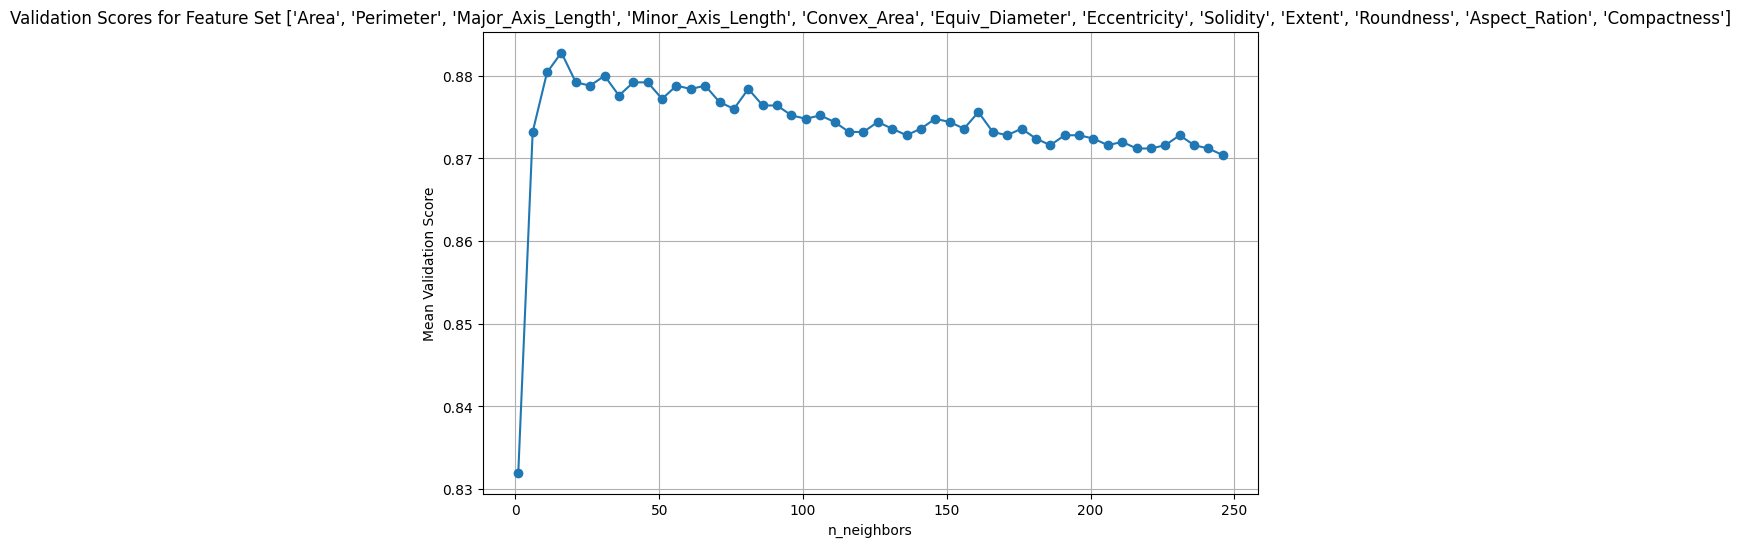

Best parameters for feature set ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent', 'Roundness', 'Aspect_Ration', 'Compactness']: {'n_neighbors': 16}
Best cross-validation score: 0.8828


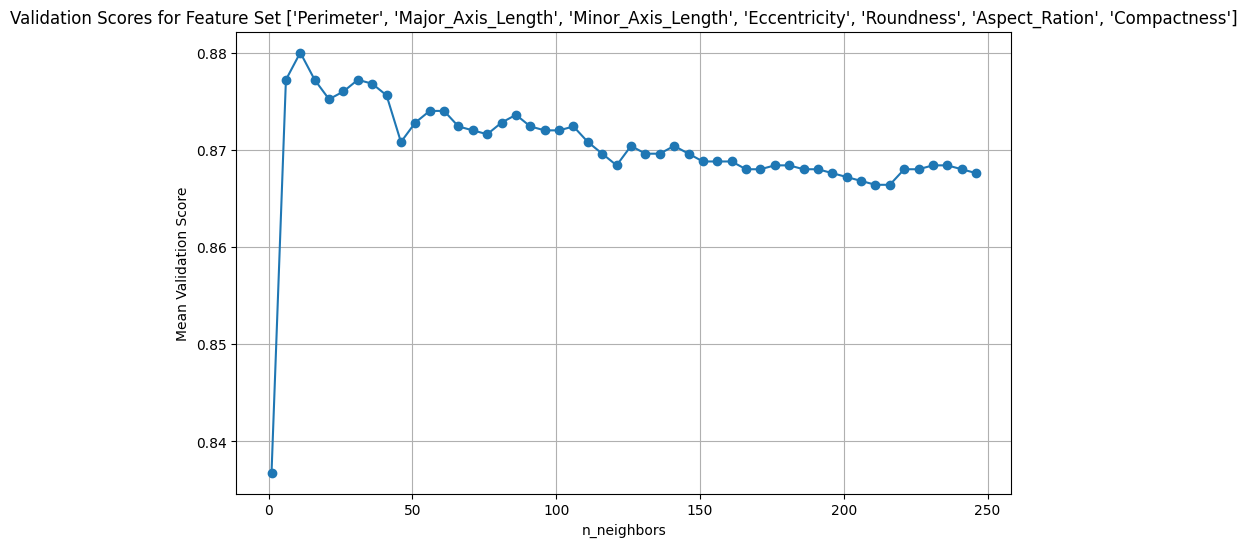

Best parameters for feature set ['Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity', 'Roundness', 'Aspect_Ration', 'Compactness']: {'n_neighbors': 11}
Best cross-validation score: 0.8800


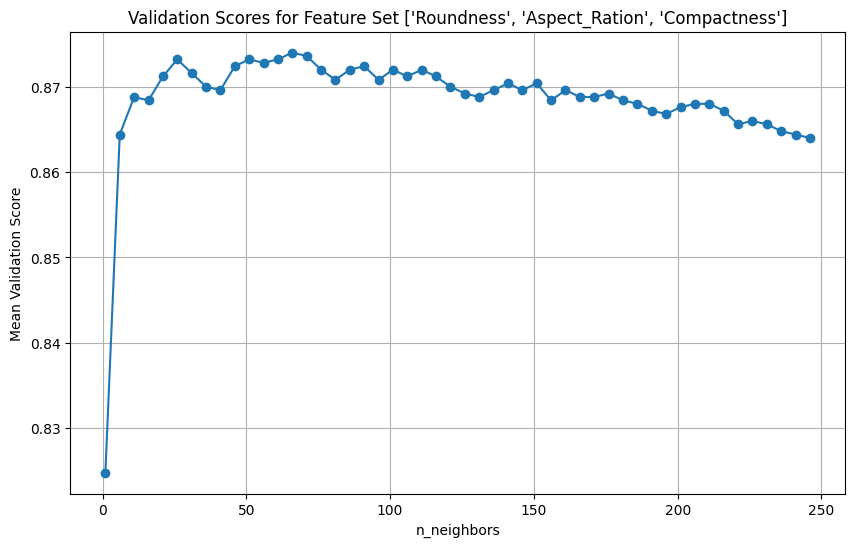

Best parameters for feature set ['Roundness', 'Aspect_Ration', 'Compactness']: {'n_neighbors': 66}
Best cross-validation score: 0.8740


In [88]:
# Define the hyperparameters to search
param_grid = {
    'n_neighbors': list(range(1, 251, 5)),  # Range from 0 to 250, with increments of 5
}

# Define the features to search
feature_sets = [
    data.drop(columns=['Class']).columns.tolist(), 
    ['Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity', 'Roundness', 'Aspect_Ration', 'Compactness'],
    ['Roundness', 'Aspect_Ration','Compactness']
]

best_model = None
best_score = 0

#So for each feature set, grid search across hyperparameter combinations and retrieve the best one.
for features in feature_sets:   
    X_selected = X[features]
    X_selected = scaler.fit_transform(X_selected)

    # Initialize KNN classifier and grid search
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

    # Perform grid search
    grid_search.fit(X_selected, y)

    # Get the best model and its performance
    if grid_search.best_score_ > best_score:
        best_model = grid_search.best_estimator_
        best_score = grid_search.best_score_

    results = grid_search.cv_results_

    # Extract the hyperparameters and corresponding scores
    params = results['params']
    mean_scores = results['mean_test_score']

    # Plot the validation scores
    plt.figure(figsize=(10, 6))
    plt.plot([param['n_neighbors'] for param in params], mean_scores, marker='o')
    plt.title(f'Validation Scores for Feature Set {features}')
    plt.xlabel('n_neighbors')
    plt.ylabel('Mean Validation Score')
    plt.grid(True)
    plt.show()

    print(f'Best parameters for feature set {features}: {grid_search.best_params_}')
    print(f'Best cross-validation score: {grid_search.best_score_:.4f}')

The results of the grid search with cross-validation reveal interesting insights into the performance of the K-Nearest Neighbors (KNN) algorithm on different combinations of features. 

For the feature set consisting of ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent', 'Roundness', 'Aspect_Ration', 'Compactness'], the best performing model was achieved with a value of `n_neighbors=16`. This implies that considering 16 nearest neighbors for predictions led to the highest cross-validated accuracy of approximately 88.28%. This set of features appears to capture a comprehensive representation of the seed characteristics, allowing the model to make accurate predictions.

For the feature set ['Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity', 'Roundness', 'Aspect_Ration', 'Compactness'], the optimal number of neighbors was found to be `n_neighbors=11`, resulting in a cross-validated accuracy of approximately 88.00%. This subset of features, which had at least 0.4 correlation, also performed well in classification.

Finally, the feature set ['Roundness', 'Aspect_Ration', 'Compactness'] produced the best performance with a relatively high value of `n_neighbors=66`, achieving a cross-validated accuracy of around 87.40%. This suggests that these three features alone contain meaningful information for distinguishing between the different seed types, as evident with their correlation greater than 0.67. 

Overall, the results emphasize the importance of feature selection in achieving optimal performance with the KNN algorithm. While certain combinations of features provided similar levels of accuracy, it's worth noting that using a more comprehensive set of attributes led to the highest overall performance. The chosen feature set should strike a balance between informativeness and computational efficiency. Nonetheless, the difference in accuracy was not that great, so there is still room for discussion concerning the relationship between attribute selection and performance. These questions may need to be answered given a larger dataset with a greater selection of features.

## Gaussian Naive Bayes
Gaussian Naive Bayes is appropriate here as opposed to multinomial as we are dealing with continuous real data. Further,  I will carry over variables used while creating the KNN models, so make sure those cells are run beforehand.

In [89]:
# Create and train a Gaussian Naive Bayes classifier model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Use the model to predict testing data
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print('Testing accuracy is: %.4f\n' % accuracy)

report = classification_report(y_test, y_pred)
print(report)

# Explore the learned probability (model parameters)
print('Estimated probability of classess: \n', gnb.class_prior_)
print('Estimated mean for each Gaussian distribution: \n', gnb.theta_)

Testing accuracy is: 0.8580

               precision    recall  f1-score   support

   Çerçevelik       0.85      0.89      0.87       260
Ürgüp Sivrisi       0.87      0.82      0.85       240

     accuracy                           0.86       500
    macro avg       0.86      0.86      0.86       500
 weighted avg       0.86      0.86      0.86       500

Estimated probability of classess: 
 [0.52 0.48]
Estimated mean for each Gaussian distribution: 
 [[-0.16704513 -0.37642442 -0.54425991  0.38416897 -0.1649652  -0.15817254
  -0.67316041 -0.11552687  0.2422166   0.64325535 -0.69704263  0.70185569]
 [ 0.16125053  0.38978207  0.5745897  -0.43363405  0.1581473   0.15067628
   0.73063652  0.16541443 -0.2165595  -0.69650636  0.75527776 -0.75884643]]


In [ ]:
# Assuming 'y_true' contains the true labels and 'y_pred' contains the predicted labels
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Our baseline GNB model performed slightly better than the base KNN model with acuracy of 85%. It's confusion matrix split is also very similar to that of the KNN model.

The Gaussian Naive Bayes model was subjected to 5-fold cross-validation to assess its performance. The cross-validation scores across the folds were as follows: [0.798, 0.812, 0.806, 0.758, 0.75]. The mean cross-validation score was calculated to be approximately 78.48%, indicating a favorable level of accuracy. Additionally, the standard deviation of 0.0257 suggests that the model's performance exhibits modest variability across different subsets of the data. This cross-validation process provides a robust estimate of the model's generalization capabilities, accounting for potential biases introduced by a specific data split. However, it is imperative to validate the model's performance on an entirely unseen test set for final assessments.

# Conclusion
The comparison between the K-Nearest Neighbors (KNN) and Gaussian Naive Bayes (GNB) models revealed that KNN exhibited superior performance. One key factor contributing to this difference lies in the nature of the dataset. With 11 numerical attributes and 1 categorical feature, KNN's ability to measure similarity based on distance proved advantageous. The continuous nature of the features allowed KNN to effectively discern patterns and relationships between data points. Additionally, the availability of only one categorical feature may have limited the suitability of GNB, which is more adept at handling discrete, countable data. Furthermore, the KNN algorithm's non-parametric nature allowed it to adapt more flexibly to complex decision boundaries. This adaptability is particularly beneficial when dealing with datasets that may not adhere strictly to the underlying Gaussian assumptions of GNB. These factors collectively contributed to the KNN model's superior performance in this specific analysis.